### Back Propagation Implementation

#### Author:  Yifan Wang



In [4]:
import numpy as np
import math
# import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_breast_cancer
import sklearn.linear_model
import matplotlib.pyplot as plt

In [5]:
# Helper Functions:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def minmax(x):
    
    return (x- np.min(x))/(np.max(x)- np.min(x))


def load_data(split = 0.7):
    data,label = load_breast_cancer(return_X_y=True)
    
    for i in range(data.shape[1]):
        data[:,i] = minmax(data[:,i])
    
    
    perm = np.random.permutation([i for i in range(data.shape[0])])
    data = data[perm,:]
    label = label[perm]
    n_split = int(data.shape[0]*split)
    X_train = data[:n_split,:]
    y_train = label[:n_split].reshape((-1,1))
    
    X_test = data[n_split:,:]
    y_test = label[n_split:].reshape((-1,1))
    return (X_train,y_train,X_test,y_test)




## Let's First Implement the Most Single Layer network with Sigmoid activation:
### a.k.a Logistic Regression

We will use cross-entropy as the loss function:

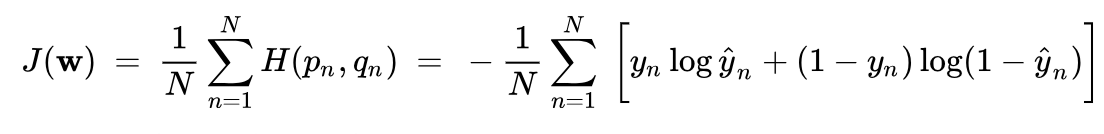


In [6]:
# Let's Load 2 category Breast Cancer Classification Data from SKlearn:
X_train,y_train,X_test,y_test = load_data(0.6)

Our Network:

In [10]:
# Initialize W and b:
n_x =X_train.shape[1]
n_h = 1
W = np.random.randn(n_x,n_h) * 0.01
b = np.zeros(shape=(1,n_h))

print("W shape: {}".format(W.shape))
print("b shape: {}".format(b.shape))

W shape: (30, 1)
b shape: (1, 1)


In [11]:
#Some parameters:
m = len(X_train)
learning_rate = 0.1
n_epochs = 100

In [13]:
all_loss = []

for i in range(n_epochs):
    # Forward Propagate:
    h = X_train.dot(W) + b 
    output = sigmoid(h)
    # Loss:
    loss = np.squeeze(-np.sum(y_train*np.log(output) + (1-y_train)*np.log(1-output))/m)
    
    
    if i%1000==0:
        print('Epoch:%d'%i)
        print("Loss--{}".format( np.round(loss,4) ))
        print()
    all_loss.append(loss)

    
    
    # Back Propagate:
    
    '''
    1. d_loss/d_output = - y/output  + (1-y)/(1-output)    derivative of cross-entropy w.r.t a
    '''
    d_output =  - y_train/output + (1-y_train)/(1-output)


    '''
    2. d_loss/d_h = d_loss/d_output * d_output/d_h = d_loss/d_output * output*(1-output)
    
    I'm taking the hard route for the NN demonstration purpose, 
    most of the time this can be simplified to (output-y) directly
    '''
    d_h = d_output * (output*(1-output))


    '''
    3. d_loss/d_w = d_loss/d_h * d_h/d_w
    '''

    d_w = (1/m)*np.dot(d_h.T,X_train).T

  

    # d_loss/d_w = d_loss/d_h * d_h/d_w
    d_b = (1/m)*np.sum(d_h * 1,keepdims=True)

    
    W-=learning_rate*d_w
    b-=learning_rate*d_b





Epoch:0
Loss--0.4971

(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 1)
(341, 30)
(30, 1)
(341, 

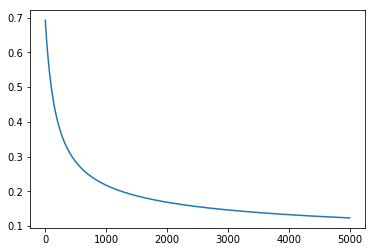

In [736]:
# Check out loss:
plt.plot(all_loss)

In [737]:
# Prediction:
pred = sigmoid(X_test.dot(W) + b)
pred[pred>=0.5] = 1
pred[pred<0.5] = 0

In [738]:
# Check Accuracy:

acc = str(round(100*float(np.sum(pred==y_test))/len(y_test),4))+'%'


print('Our validation accuracy is: %s'%acc)



Our validation accuracy is: 96.0526%


##  Implementation of 2-layer  Feed-Foward  NN:

#### Looks like the implementation above is not good enough for this toy dataset, let's increase 1 layer:


In [739]:
# Initialize W and b:
n_x =X_train.shape[1]

n_h0 = 64 # 
n_h = 1

W0 = np.random.randn(n_x,n_h0) * 0.01  # n_x x 128
W1 = np.random.randn(n_h0,n_h) * 0.01  # 128 x 1
b0 = np.zeros(shape=(1,n_h0))
b1 = np.zeros(shape=(1,n_h))





print("W0 shape: {}".format(W0.shape))
print("b0 shape: {}".format(b0.shape))

print("W1 shape: {}".format(W1.shape))
print("b1 shape: {}".format(b1.shape))

W0 shape: (30, 64)
b0 shape: (1, 64)
W1 shape: (64, 1)
b1 shape: (1, 1)


In [740]:
#Some parameters:
m = len(X_train)
learning_rate = 0.1
n_epochs = 5000

In [741]:
all_loss = []

for i in range(n_epochs):
    # Forward Propagate:
    # First layer:
    h0 = X_train.dot(W0) + b0
    a0 = sigmoid(h0)
    # Second Layer:
    h1 = a0.dot(W1) + b1
    output = sigmoid(h1)    
    # Loss:
    loss = np.squeeze(-np.sum(y_train*np.log(output) + (1-y_train)*np.log(1-output))/m)
    
    if i%1000==0:
        print('Epoch:%d'%i)
        print("Loss--{}".format( np.round(loss,4) ))
        print()
    all_loss.append(loss)

    
    # Back Propagate:
    
    '''
    1. d_loss/d_output = - y/output  + (1-y)/(1-output)    derivative of cross-entropy w.r.t a
    '''
    d_output =  - y_train/output + (1-y_train)/(1-output)


    '''
    2. d_loss/d_h1 = d_loss/d_output * d_output/d_h1 = d_loss/d_output * output*(1-output)
    
    I'm taking the hard route for the NN demonstration purpose, 
    most of the time this can be simplified to (output-y) directly
    '''
    d_h1 = d_output * (output*(1-output))

    '''
    3. d_loss/d_w1 = d_loss/d_h1 * d_h1/d_w1
    '''

    d_w1 = (1/m)*np.dot(d_h1.T,a0).T

    
    '''
    4. d_loss/d_b1 = d_loss/d_h1 * d_h/d_b1
    '''
    # 
    d_b1 = (1/m)*np.sum(d_h1 * 1,keepdims=True)

    
    
    
    
    
    ### bp to first layer:
    
    '''
    5. d_loss/d_a0 = d_loss/d_h1 * d_h1/d_a0
    '''
    d_a0 =  np.dot(d_h1,W1.T)
    
    '''
    6. d_loss/d_h0 = d_loss/d_a0 * d_a0/d_h0 = d_loss/d_a0 * a0*(1-a0)
    '''    
    d_h0 = d_a0* (a0*(1-a0))

    '''
    7. d_loss/d_w0 = d_loss/d_h0 * d_h0/d_w0
    '''    
    d_w0 = (1/m)*np.dot(d_h0.T,X_train).T

    '''
    8. d_loss/d_b0 = d_loss/d_h0 * d_h/d_b0
    '''      
    d_b0 = (1/m)*np.sum(d_h0 * 1,keepdims=True)
    
    
    
    W1-=learning_rate*d_w1
    b1-=learning_rate*d_b1
    
    W0-=learning_rate*d_w0
    b0-=learning_rate*d_b0





Epoch:0
Loss--0.686

Epoch:1000
Loss--0.2385

Epoch:2000
Loss--0.1257

Epoch:3000
Loss--0.101

Epoch:4000
Loss--0.0896



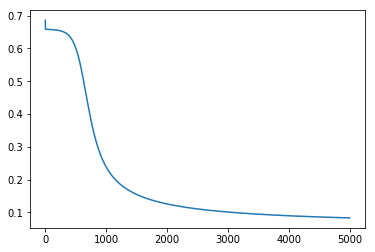

In [742]:
# Check out loss:
plt.plot(all_loss)

In [743]:
# Prediction:

h00 = X_test.dot(W0) + b0
a00 = sigmoid(h00)
# Second Layer:
h11 = a00.dot(W1) + b1
pred = sigmoid(h11)   


pred[pred>=0.5] = 1
pred[pred<0.5] = 0

In [744]:
# Check Accuracy:

acc = str(round(100*float(np.sum(pred==y_test))/len(y_test),4))+'%'


print('Our validation accuracy is: %s'%acc)



Our validation accuracy is: 97.807%


### Adding a layer outperforms the logistic regression